<a href="https://colab.research.google.com/github/DuwcHieu/Time-series/blob/main/Kiem%20Tra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install statsmodels --upgrade


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


<Axes: title={'center': 'Doanh số bán lẻ hàng tháng'}>

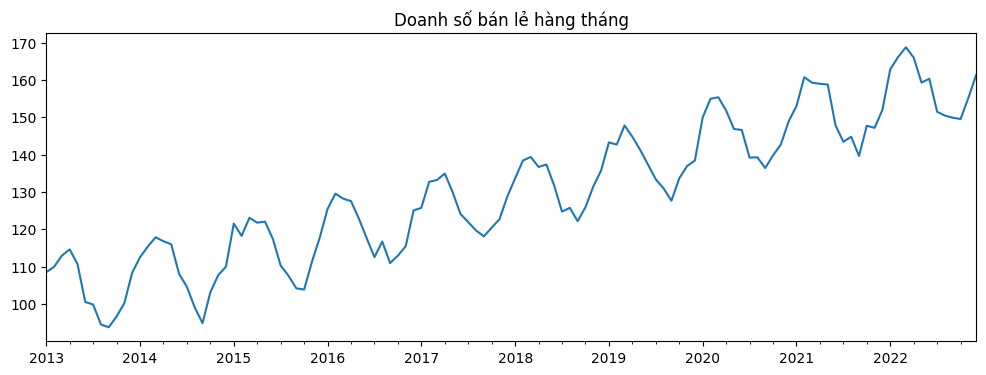

In [9]:
np.random.seed(0)
periods = 120
dates = pd.date_range(start='2013-01-01', periods=periods, freq='MS')
seasonality = 10 * np.sin(2 * np.pi * dates.month / 12)
trend = 0.5 * np.arange(periods)
noise = np.random.normal(scale=2, size=periods)
sales = 100 + trend + seasonality + noise

ts = pd.Series(sales, index=dates)
ts.plot(title='Doanh số bán lẻ hàng tháng', figsize=(12, 4))


In [10]:
# Kiểm tra tính dừng
result = adfuller(ts)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Nếu không dừng, lấy sai phân
ts_diff = ts.diff().dropna()
ts_diff_seasonal = ts_diff.diff(12).dropna()

# Kiểm tra lại
result = adfuller(ts_diff_seasonal)
print(f"ADF Statistic (sau sai phân): {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 2.4145794058563803
p-value: 0.9990170064517125
ADF Statistic (sau sai phân): -4.654459481825697
p-value: 0.00010238915483418575


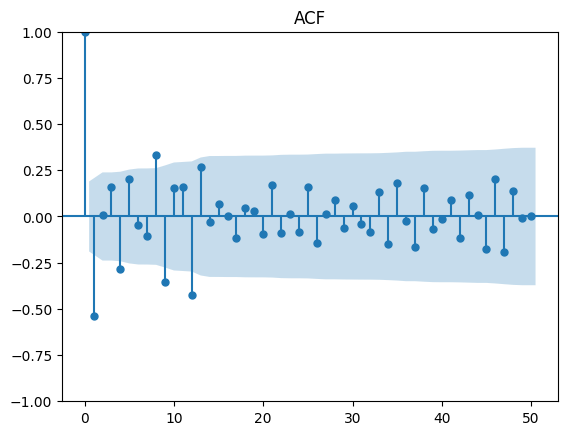

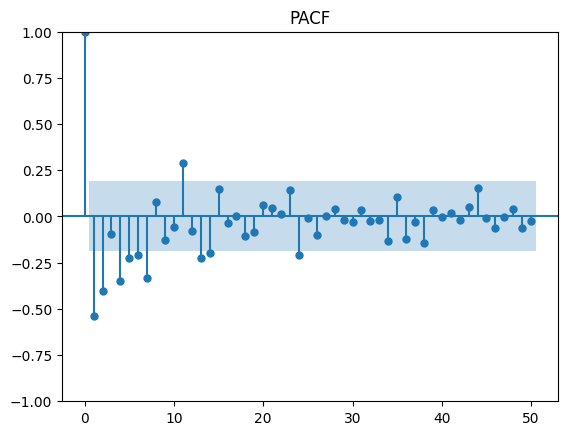

In [11]:
plot_acf(ts_diff_seasonal, lags=50)
plt.title("ACF")
plt.show()

plot_pacf(ts_diff_seasonal, lags=50)
plt.title("PACF")
plt.show()


In [12]:
model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -208.705
Date:                            Tue, 03 Jun 2025   AIC                            427.409
Time:                                    10:34:44   BIC                            440.072
Sample:                                01-01-2013   HQIC                           432.522
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0379      0.108     -0.351      0.726      -0.250       0.174
ma.L1         -0.9079      0.060   

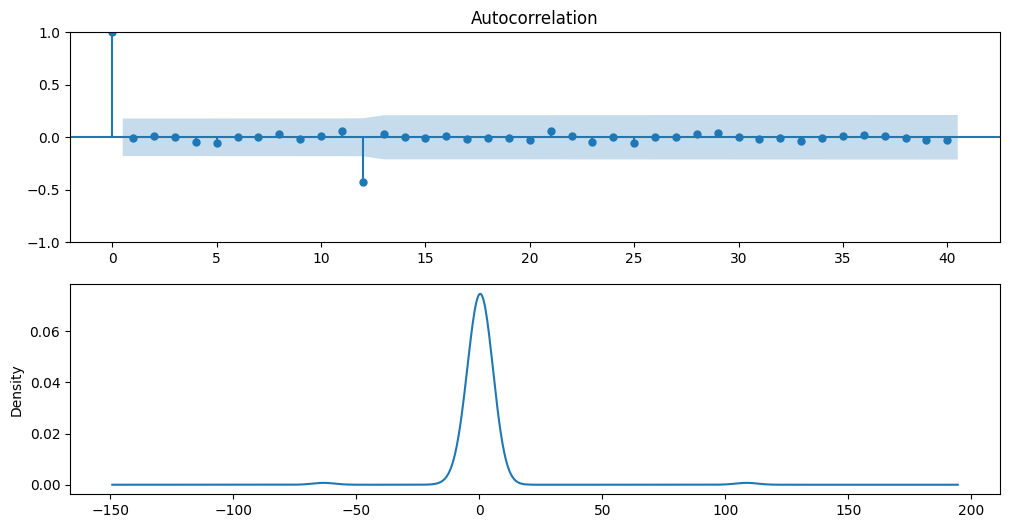

In [13]:
residuals = results.resid

fig, ax = plt.subplots(2, 1, figsize=(12,6))
plot_acf(residuals.dropna(), lags=40, ax=ax[0])
residuals.plot(kind='kde', ax=ax[1])
plt.show()


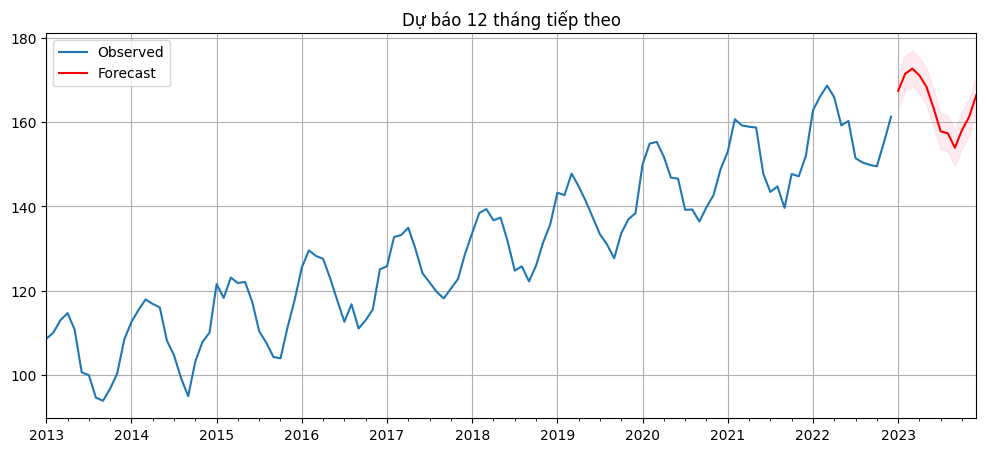

In [14]:
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 5))
ts.plot(label='Observed')
forecast_mean.plot(label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Dự báo 12 tháng tiếp theo")
plt.legend()
plt.grid(True)
plt.show()
